## Observations and Insights 

In [5]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_study_results=pd.merge(mouse_metadata, study_results, on="Mouse ID", how="outer")

# Display the data table for preview
mouse_study_results

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [ ]:
# Checking the number of mice.
mice_number = len(mouse_study_results['Mouse ID'].unique())
mice_number

In [6]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mouse_ids = mouse_study_results.loc[mouse_study_results.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
duplicate_mouse_ids

array(['g989'], dtype=object)

In [7]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse_detail = mouse_study_results[mouse_study_results.duplicated(subset=['Mouse ID','Timepoint'], keep=False)]
duplicate_mouse_detail

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [8]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mouse_dataframe = mouse_study_results[mouse_study_results['Mouse ID'].isin(duplicate_mouse_ids)==False]
clean_mouse_dataframe

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [9]:
# Checking the number of mice in the clean DataFrame.
mice_number_new = len(clean_mouse_dataframe['Mouse ID'].unique())
mice_number_new

248

## Summary Statistics

In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

tumor_stats_group = pd.DataFrame(clean_mouse_dataframe.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean())
tumor_stats_group = tumor_stats_group.rename(columns={'Tumor Volume (mm3)': 'Mean'})
tumor_stats_group["Variance"] = pd.DataFrame(clean_mouse_dataframe.groupby("Drug Regimen")["Tumor Volume (mm3)"].var())
tumor_stats_group["Standard Deviation"] = pd.DataFrame(clean_mouse_dataframe.groupby("Drug Regimen")["Tumor Volume (mm3)"].std())
tumor_stats_group["SEM"] = pd.DataFrame(clean_mouse_dataframe.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem())
tumor_stats_group

,Mean,Variance,Standard Deviation,SEM
Drug Regimen,,,,
Capomulin,40.675741,24.947764,4.994774,0.329346
Ceftamin,52.591172,39.290177,6.268188,0.469821
Infubinol,52.884795,43.128684,6.567243,0.492236
Ketapril,55.235638,68.553577,8.279709,0.603860
Naftisol,54.331565,66.173479,8.134708,0.596466
Placebo,54.033581,61.168083,7.821003,0.581331
Propriva,52.320930,43.852013,6.622085,0.544332
Ramicane,40.216745,23.486704,4.846308,0.320955
Stelasyn,54.233149,59.450562,7.710419,0.573111


In [11]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line
tumor_stats_agg = clean_mouse_dataframe.groupby('Drug Regimen').agg({"Tumor Volume (mm3)": ['mean', 'var', 'std', 'sem']})


# Rename columns
tumor_stats_agg = tumor_stats_agg.rename(columns={'mean': 'Mean',
                                                  'var': 'Variance',
                                                  'std': 'Standard Deviation',
                                                  'sem': 'SEM'
                                                 })

# Output
tumor_stats_agg 

Tumor Volume (mm3)                                        
                           Mean   Variance Standard Deviation       SEM
Drug Regimen                                                           
Capomulin             40.675741  24.947764           4.994774  0.329346
Ceftamin              52.591172  39.290177           6.268188  0.469821
Infubinol             52.884795  43.128684           6.567243  0.492236
Ketapril              55.235638  68.553577           8.279709  0.603860
Naftisol              54.331565  66.173479           8.134708  0.596466
Placebo               54.033581  61.168083           7.821003  0.581331
Propriva              52.320930  43.852013           6.622085  0.544332
Ramicane              40.216745  23.486704           4.846308  0.320955
Stelasyn              54.233149  59.450562           7.710419  0.573111
Zoniferol             53.236507  48.533355           6.966589  0.516398

## Bar and Pie Charts

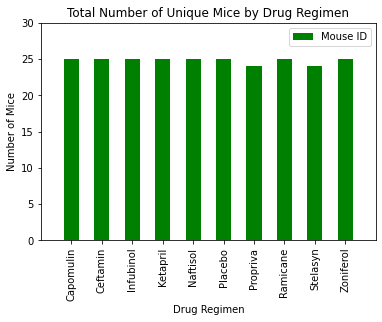

In [12]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.

mice_count_by_regimen = pd.DataFrame(clean_mouse_dataframe.groupby("Drug Regimen")["Mouse ID"].nunique())

mice_count_by_regimen.plot(kind="bar", facecolor="green")

plt.title("Total Number of Unique Mice by Drug Regimen")
plt.ylabel("Number of Mice")
plt.xlabel("Drug Regimen")
plt.xlim(-1, len(mouse_study_results['Drug Regimen'].unique()))
plt.ylim(0, 30)


plt.show()

In [13]:
mice_count_by_regimen

,Mouse ID
Drug Regimen,
Capomulin,25
Ceftamin,25
Infubinol,25
Ketapril,25
Naftisol,25
Placebo,25
Propriva,24
Ramicane,25
Stelasyn,24


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text major ticklabel objects>)

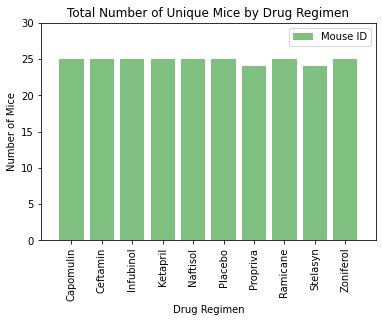

In [14]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.

drug_regimen= mice_count_by_regimen.index.tolist()
mouse = mice_count_by_regimen["Mouse ID"].tolist()
plt.title("Total Number of Unique Mice by Drug Regimen")
plt.bar(drug_regimen, mouse, alpha=0.5, color='green', align="center", label="Mouse ID")
plt.ylabel("Number of Mice")
plt.xlabel("Drug Regimen")
plt.xlim(-1, len(mouse_study_results['Drug Regimen'].unique()))
plt.ylim(0, 30)
plt.legend(loc="best")
plt.xticks(rotation=90)



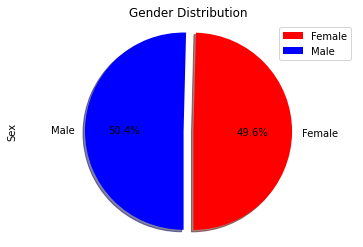

In [62]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

gender_by_regimen = pd.DataFrame(clean_mouse_dataframe.groupby("Sex")["Mouse ID"].nunique())



gender_by_regimen.plot(kind="pie", y='Mouse ID', autopct='%1.1f%%',colors = ('red', 'blue'), title=("Gender Distribution"), shadow = True, explode = [0,0.1], startangle = 270)
plt.axis("equal")
plt.ylabel("Sex")
plt.legend(loc="best")


In [16]:
gender_by_regimen

,Mouse ID
Sex,
Female,123
Male,125


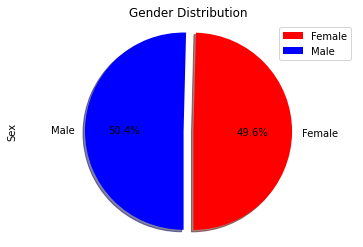

In [63]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# Creating dataset 
gender= gender_by_regimen.index.tolist()
gender_count = gender_by_regimen["Mouse ID"].tolist()  

# Creating explode data 
explode = (0, 0.1) 
  
# Creating color parameters 
colors = ( "red", "blue") 

plt.pie(gender_count, labels = gender, explode=explode, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=270) 
plt.title("Gender Distribution")
plt.axis("equal")
plt.ylabel("Sex")
plt.legend(loc="best")

## Quartiles, Outliers and Boxplots

In [18]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse 
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
tumor_last_timepoint = clean_mouse_dataframe.drop_duplicates(subset='Mouse ID', keep="last")

#Filter for the 4 treatment regimens
capomulin_df = tumor_last_timepoint.loc[(tumor_last_timepoint["Drug Regimen"] == "Capomulin")]
ramicane_df = tumor_last_timepoint.loc[(tumor_last_timepoint["Drug Regimen"] == "Ramicane")]
infubinol_df = tumor_last_timepoint.loc[(tumor_last_timepoint["Drug Regimen"] == "Infubinol")]
                                                (tumor_last_timepoint["Drug Regimen"] == "Ceftamin")]
tumor_last_timepoint_filter

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
9,k403,Ramicane,Male,21,16,45,22.050126,1
19,s185,Capomulin,Female,3,17,45,23.343598,1
29,x401,Capomulin,Female,16,15,45,28.484033,0
39,m601,Capomulin,Male,22,17,45,28.430964,1
49,g791,Ramicane,Male,11,16,45,29.128472,1
...,...,...,...,...,...,...,...,...
1797,x822,Ceftamin,Male,3,29,45,61.386660,3
1813,y163,Infubinol,Female,17,27,45,67.685569,3
1845,y769,Ceftamin,Female,6,27,45,68.594745,4
1855,y865,Ceftamin,Male,23,26,45,64.729837,3


In [60]:
# Put treatments into a list for for loop (and later for plot labels)

treatment_list = []
for item in tumor_last_timepoint_filter['Drug Regimen']:
     if not item in treatment_list:
        treatment_list.append(item)

# Create empty list to fill with tumor vol data (for plotting)
tumor_value=[]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

quartiles = tumor_last_timepoint_filter['Tumor Volume (mm3)'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(lowerq)
print(upperq)
print(iqr)



# Locate the rows which contain mice on each drug and get the tumor volumes
tumor_last_timepoint_grouped=tumor_last_timepoint_filter.groupby('Drug Regimen')
tumor_last_timepoint_grouped=tumor_last_timepoint_grouped.groups  
print(tumor_last_timepoint_grouped)

# add subset 
    
    
# Determine outliers using upper and lower bounds
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
    
print(lower_bound)
print(upper_bound)
outlier_tumor = tumor_last_timepoint_filter.loc[(tumor_last_timepoint_filter['Tumor Volume (mm3)'] < lower_bound) | (tumor_last_timepoint_filter['Tumor Volume (mm3)'] > upper_bound)]


37.187743802499995
59.930261755000004
22.74251795250001
{'Capomulin': Int64Index([  19,   29,   39,   64,  104,  124,  134,  144,  164,  204,  224,
             244,  282,  299,  309,  317,  337,  340,  350,  360,  370,  380,
             390,  440, 1455],
           dtype='int64'), 'Ceftamin': Int64Index([ 493,  594,  600,  617,  840,  940,  993, 1033, 1112, 1119, 1122,
            1132, 1162, 1260, 1379, 1406, 1551, 1582, 1583, 1670, 1743, 1773,
            1797, 1845, 1855],
           dtype='int64'), 'Infubinol': Int64Index([ 463,  473,  530,  540,  637,  669,  742,  800,  834,  949, 1053,
            1076, 1205, 1225, 1312, 1314, 1397, 1485, 1616, 1632, 1640, 1683,
            1726, 1813, 1872],
           dtype='int64'), 'Ramicane': Int64Index([  9,  49,  59,  74,  84,  94, 114, 154, 174, 184, 194, 214, 234,
            254, 262, 272, 289, 327, 400, 410, 420, 430, 447, 449, 453],
           dtype='int64')}
3.0739668737499812
94.04403868375002


In [66]:
#capomulin test

cap_df = clean_mouse_dataframe.loc[clean_mouse_dataframe["Drug Regimen"] == "Capomulin",:]
caplast = cap_df.groupby('Mouse ID').max()['Timepoint']
caplast

Mouse ID
b128    45
b742    45
f966    20
g288    45
g316    45
i557    45
i738    45
j119    45
j246    35
l509    45
l897    45
m601    45
m957    45
r157    15
r554    45
r944    45
s185    45
s710    45
t565    45
u364    45
v923    45
w150    10
w914    45
x401    45
y793    45
Name: Timepoint, dtype: int64

In [61]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
 

## Line and Scatter Plots

In [ ]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [ ]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
